# Try to find changepoints using SPE or T2 metric for custom dataset

Dataset:
We generate custom time-series datasets with 3000 points, and randomly assign a section of the data to act as the "anomoly". sections of the data before and after the anomoly follow a linear relationship $y = mx + b$ with arbitrariy slope. The section of the anomoly follows a sinusoidal relationship $y = sin(ax)$ with arbitrary a. See [custom_data.ipynb](custom_data.ipynb) for the dataset generation process.

We then assign the time series data $$x_1, x_2, x_3, ..., x_n$$ into matrix form $$X = \begin{bmatrix}x_1 & ... & x_w \\ x_2 & ... & x_{w+1} \\ ... & ... & ... \\ x_{n-w} & ... & x_n \end{bmatrix}$$
where $w$ is the sliding window size and $n$ is the number of datapoints

Similarly the test datasetis transformed in to $Y$

Then X is normalized and Y is normalized using the mean and std from X

Xtrain shape (2901, 100)
total number of datapoints：2901

num SPEs above threshold：1604

num T2 above threshold：349



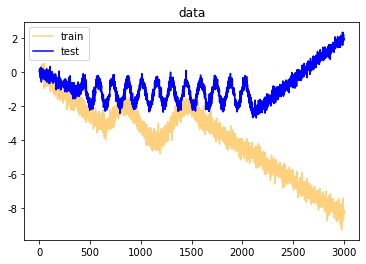

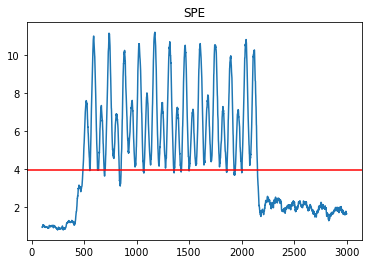

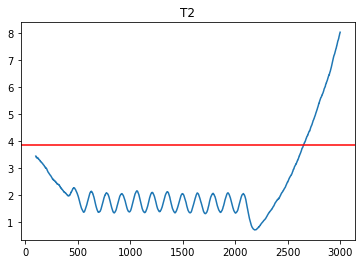

In [2]:
from pca_for_fault_diagnosis.PCA_FaultDection import PCA_FaultDection
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


traindata = np.load('data/sim/simdata3.npy')
# traindata = np.concatenate((traindata,np.load('data/sim/simdata2.npy')))

# from scipy.ndimage.filters import gaussian_filter
# mydata = gaussian_filter(data, sigma=3)

testdata = np.load('data/sim/simdata2.npy')

# transform in to matrix with sliding window
window_size = 100
X = np.zeros((len(traindata)-window_size+1, window_size))
Y = np.zeros((len(testdata)-window_size+1, window_size))
for i in range(len(traindata)-window_size+1):
    X[i,:] = traindata[i:i+window_size]
for i in range(len(testdata)-window_size+1):
    Y[i,:] = testdata[i:i+window_size]

model = PCA_FaultDection(cumper=0.95, signifi=0.95)

[X_Train,X_test] = model.normalize(X, Y)

print('Xtrain shape', X_Train.shape)
model.train(X_Train)

testresult = model.test(X_test)


# plot the training and testing data
plt.clf()
plt.plot(traindata, label='train', color='orange', alpha =0.5)
plt.plot(testdata, label='test', color='b',alpha=1)

plt.legend()
plt.title("data")
plt.show()

plt.clf()
plt.plot(np.arange(len(testresult['SPE']))+window_size, testresult['SPE'], label='SPE')
plt.title("SPE")
plt.axhline(model.model['SPE_limit'], color='r')
plt.show()
plt.clf()
plt.title("T2")
plt.plot(np.arange(len(testresult['T2'])) + window_size,testresult['T2'], label='T2')
plt.axhline(model.model['T2_limit'], color='r')
plt.show()
# cps_spe = findChangepoints(testresult['SPE'], model.model['SPE_limit'], window_size)
# cps_t2 = findChangepoints(testresult['T2'], model.model['T2_limit'], window_size)



# Try to find changepoint for torque data using SPE or T2

The same process is done to transform the time-series torque data into matrix form

total number of datapoints：1341

num SPEs above threshold：101

num T2 above threshold：132



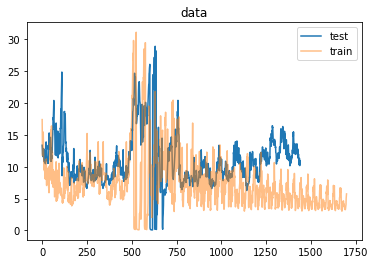

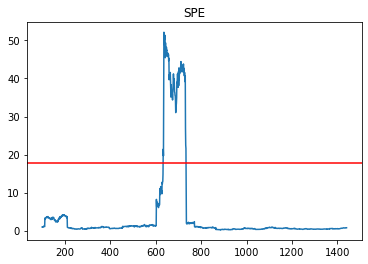

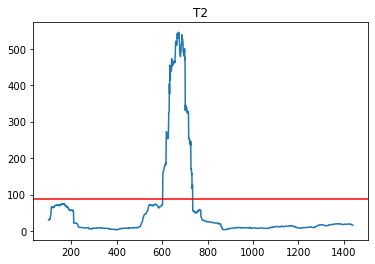

In [3]:
from pca_for_fault_diagnosis.PCA_FaultDection import PCA_FaultDection
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


trainfile = "data/torque.xlsx"
testfile = "data/torque0927.xlsx"
torqueDataFrameTrain = pd.read_excel(trainfile)
torqueDataFrameTest = pd.read_excel(testfile)


torqueDataTrain = np.asarray(torqueDataFrameTrain)
torqueDataTrain = torqueDataTrain[:,1]
traindata = torqueDataTrain[1500:3200]

torqueDataTest = np.asarray(torqueDataFrameTest)
torqueDataTest = torqueDataTest[:,1]
testdata = torqueDataTest[810:2250]


window_size = 100
X = np.zeros((len(traindata)-window_size+1, window_size))
Y = np.zeros((len(testdata)-window_size+1, window_size))
for i in range(len(traindata)-window_size+1):
    X[i,:] = traindata[i:i+window_size]
for i in range(len(testdata)-window_size+1):
    Y[i,:] = testdata[i:i+window_size]

model = PCA_FaultDection(cumper=0.95, signifi=0.95)

[X_Train,X_test] = model.normalize(X, Y)

model.train(X_Train)

testresult = model.test(X_test)



plt.clf()
plt.plot(testdata, label='test', alpha = 1)
plt.plot(traindata, label='train', alpha = 0.5)
plt.legend()
plt.title("data")
# for cp in cps_spe:
#     plt.axvline(cp, color='r', linestyle='--', label='SPE')
# for cp in cps_t2:
#     plt.axvline(cp+window_size, color='g', linestyle='--', label='T2')

plt.show()

plt.clf()
plt.plot(np.arange(len(testresult['SPE']))+window_size, testresult['SPE'], label='SPE')
plt.title("SPE")
plt.axhline(model.model['SPE_limit'], color='r')
plt.show()
plt.clf()
plt.title("T2")
plt.plot(np.arange(len(testresult['T2'])) + window_size,testresult['T2'], label='T2')
plt.axhline(model.model['T2_limit'], color='r')
plt.show()
# cps_spe = findChangepoints(testresult['SPE'], model.model['SPE_limit'], window_size)
# cps_t2 = findChangepoints(testresult['T2'], model.model['T2_limit'], window_size)



In [9]:
# def findChangepoints(values, limit, window_size):
#     cps = []
#     indices = np.argwhere(np.array(values)>limit)
#     i = 0
#     while i < len(indices):
#         cps.append(indices[i]+window_size)
#         i += window_size
#     return cps